## simulation of bifurcating

- 1. set condition and define function
- 2. set the range of a
- 3. iteration and data collection
- 4. visualization

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
def fo(a, x_current): # the first order difference equation
    y_current = x_current * a * (1-x_current)
    return y_current
def l_45(y_current): # the relationship between current y and next x
    x_next = y_current
    return x_next
def fo_2(a, x_current):
    fo_result = fo(a,x_current)
    fo_2_result = fo(a,fo_result)
    return fo_2_result
def d_fo(a,x_current):
    h=1e-5
    fo_plus = fo(a, x_current+h)
    fo_minus = fo(a, x_current-h)
    return (fo_plus - fo_minus) / (2*h)
def d_fo_2(a, x_current):
    h = 1e-5
    fo_2_plus = fo_2(a,x_current+h)
    fo_2_minus = fo_2(a, x_current-h)
    return (fo_2_plus - fo_2_minus)/(2*h)


In [33]:
def bifur_visual(a_min, a_max,  x_mini, x_max, iteration_times=100):
    a_values = np.linspace(a_min,a_max,100)
    x_s = np.linspace(x_mini, x_max, 100)
    xs_stable = []
    a_s = []
    for a in a_values:
        for x in x_s: #find stable x_values
            for _ in range(iteration_times):
                if fo(a,x) == l_45(x):
                    x = x + 0.01
                    x = fo(a,x)
                    if x >= x_max:
                        break
                else:
                    x = fo(a, x)
                    if x >= x_max:
                        break
            a_s.append(a)
            xs_stable.append(x)
    for x_stable ,a in zip(xs_stable, a_s):
        plt.scatter(a, x_stable, s=0.1, c="black")
    plt.show()
    


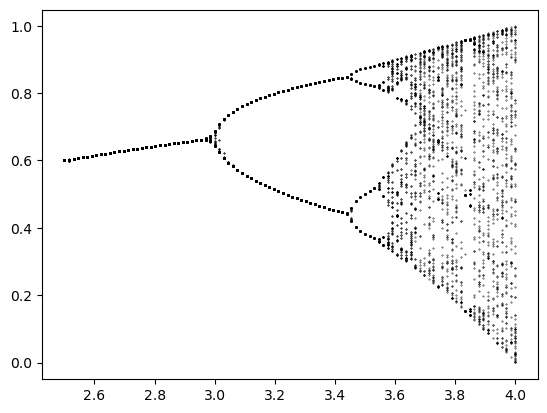

In [41]:
bifur_visual(2.5,4,0,1)

## The GPT version

[[2.5        0.6       ]
 [2.5015015  0.6002401 ]
 [2.503003   0.6004799 ]
 ...
 [3.996997   0.46852253]
 [3.9984985  0.3143155 ]
 [4.         0.85177659]]


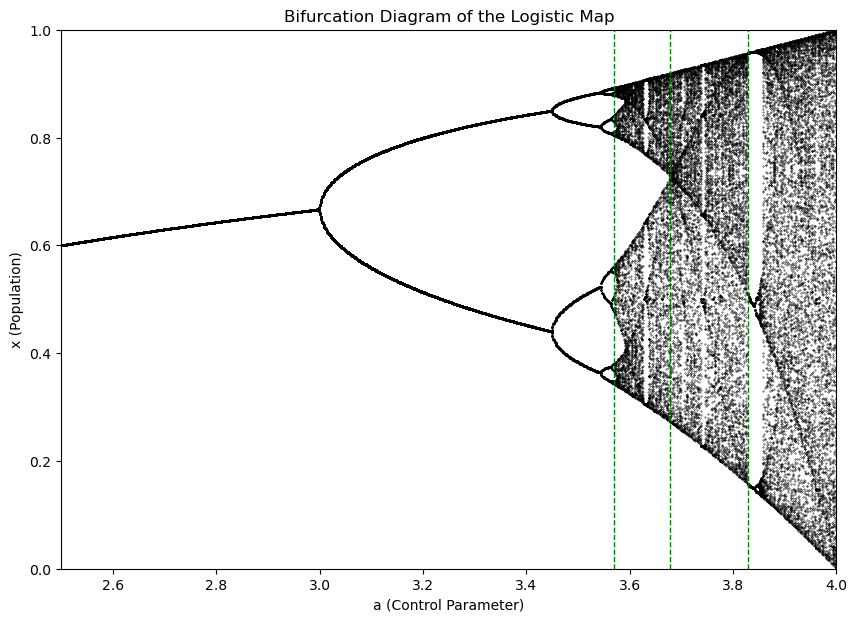

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic map function
def logistic_map(a, x):
    return a * x * (1 - x)

# Set up the parameters for the simulation
a_values = np.linspace(2.5, 4.0, 1000)  # Range of a values
iterations = 1000                       # Number of iterations per a value
last = 100                              # Number of iterations to plot to avoid transients

# Create an array to store the results
x = 1e-10 * np.ones(a_values.size)  # Initial condition for all a

# Main loop to compute the bifurcation diagram
results = []
for _ in range(iterations):
    x = logistic_map(a_values, x)
    # Only store the last 'last' iterations to display the settled behavior
    if _ >= (iterations - last):
        results.append(np.column_stack([a_values, x]))

results = np.concatenate(results)
print(results)
# Plotting
plt.figure(figsize=(10, 7))
plt.scatter(results[:, 0], results[:, 1], s=0.1, color='black')
plt.title('Bifurcation Diagram of the Logistic Map')
plt.xlabel('a (Control Parameter)')
plt.ylabel('x (Population)')
plt.axvline(x=3.8284, color='green', linestyle='--', linewidth=1)
plt.axvline(x=3.5700, color='green', linestyle='--', linewidth=1)
plt.axvline(x=3.6786, color='green', linestyle='--', linewidth=1)
plt.xlim(2.5, 4.0)
plt.ylim(0, 1)
plt.show()